# Bike Sharing Assignment

In this assignment we will study the bike sharing data for years 2018 and 2019 (pre-pandemic) so the the agency BoomBikes can predict on the factors that affect bike sharing.

### Objectives of this assignment are -
1. To find out which variables are significant in predicting the demand for shared bikes
2. And how well those variables describe the bike demand

### The steps that we will carry out for this study are as below -
1. Reading and Understanding data
2. Visualise data
3. Data preparation for modelling
4. Splitting data in training and test data
5. Building linear model
6. Residual analysis of train data
7. Making predictions using final model
8. Model evaluation

## Step 1: Reading and Understanding the Data

Let us read the csv file and store in dataframe and check the dimensions of the data

In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load CSV

df = pd.read_csv('day.csv')

In [3]:
# check first 5 records
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# check shape of the dataframe

df.shape

(730, 16)

In [5]:
# check dataframe information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
## Let's drop instant column as it is redundant

df = df.drop(['instant'],axis=1)

In [8]:
## convert dteday to the date format 
from datetime import datetime
df['dteday'] =  pd.to_datetime(df['dteday'])

#df['issue_year'] = loan['issue_d'].apply(lambda x:datetime.strptime(x,'%b-%y').year)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    int64         
 2   yr          730 non-null    int64         
 3   mnth        730 non-null    int64         
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    int64         
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    int64         
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    int64         
 13  registered  730 non-null    int64         
 14  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 85.7 KB


##### Data looks good 
1. Number of rows are manageable and are 730 with 15 columns
2. We do not have any null values in any of the columns.
3. We have datatypes defined for all columns except for dteday which is defined as object.
4. Target variable is cnt which is continuous and hence linear regression can be used. 
5. We have multiple categorical variables e.g. weathersit, season, weekday, month. We may need to think of converting them to string variables and then add dummy variables

## Step 2: Visualising the data

Let us now check how different variables are correlated to the target variable 'cnt'

##### Visualising numerical variables

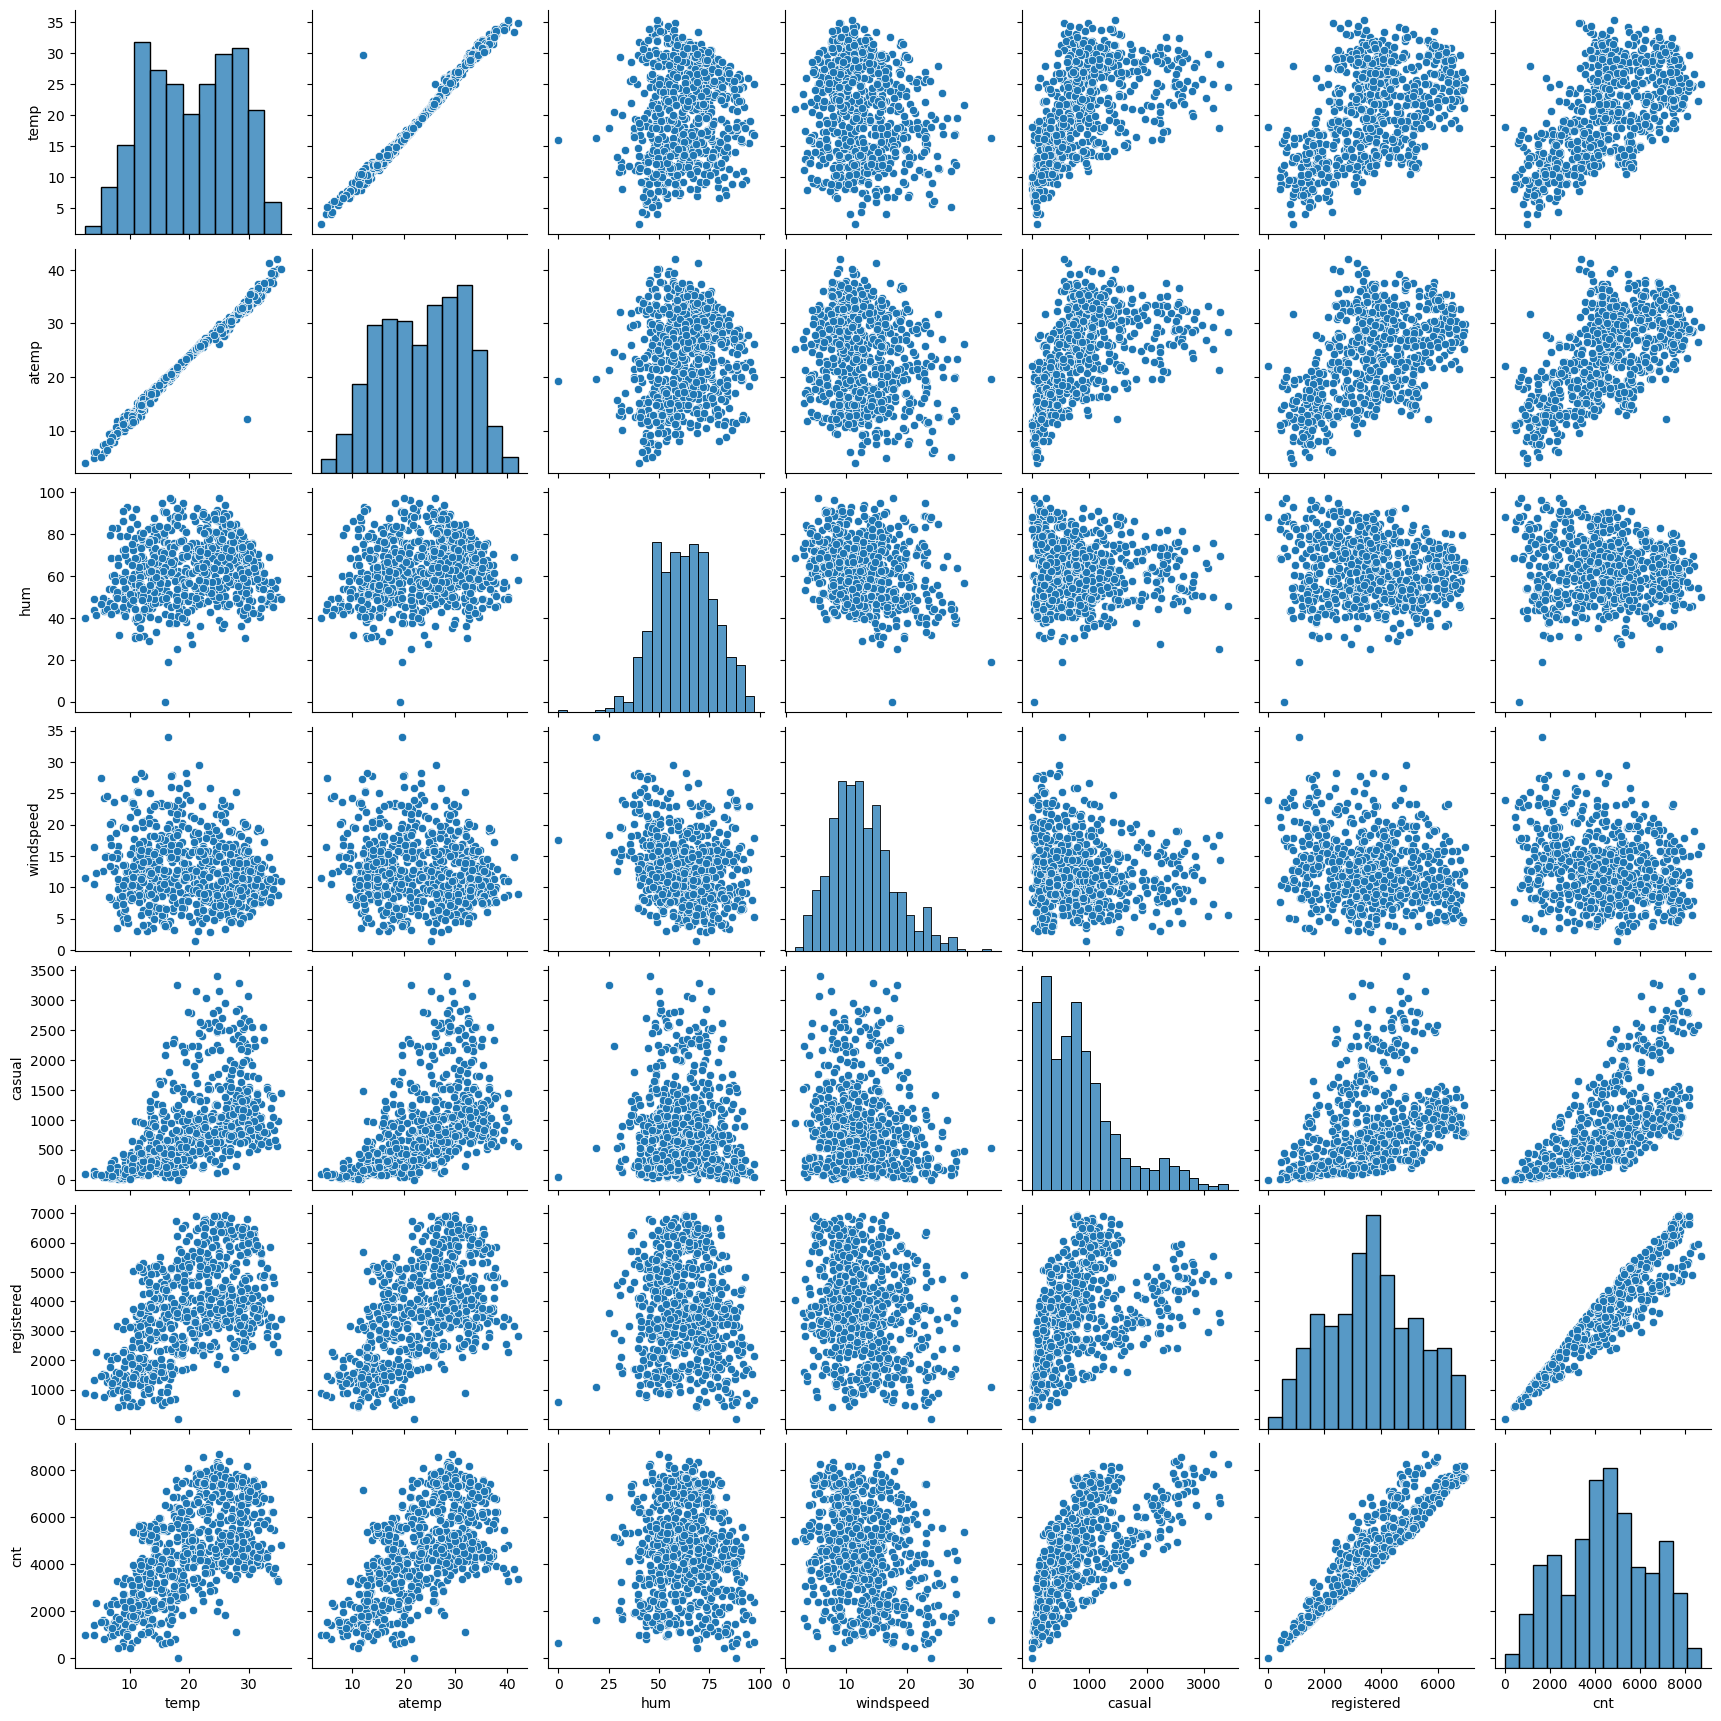

In [10]:
sns.pairplot(df[['temp','atemp','hum','windspeed','casual','registered','dteday','cnt']])

#### Observations based on pairplot
1. We can see temp and atemp have linear correlation on the cnt
2. Relation between temp and atemp is quite obvious from this graph
3. we also see when the registered and causal users go up, cnt goes up which is logical as cnt is only the total of both
3. We see data for cnt clustered around high humidity levels and lower windpseed levels.
4. When the temp goes up, we see 'registered' users and 'casual' users go up independently
5. As temp goes up, we see rise in humidity

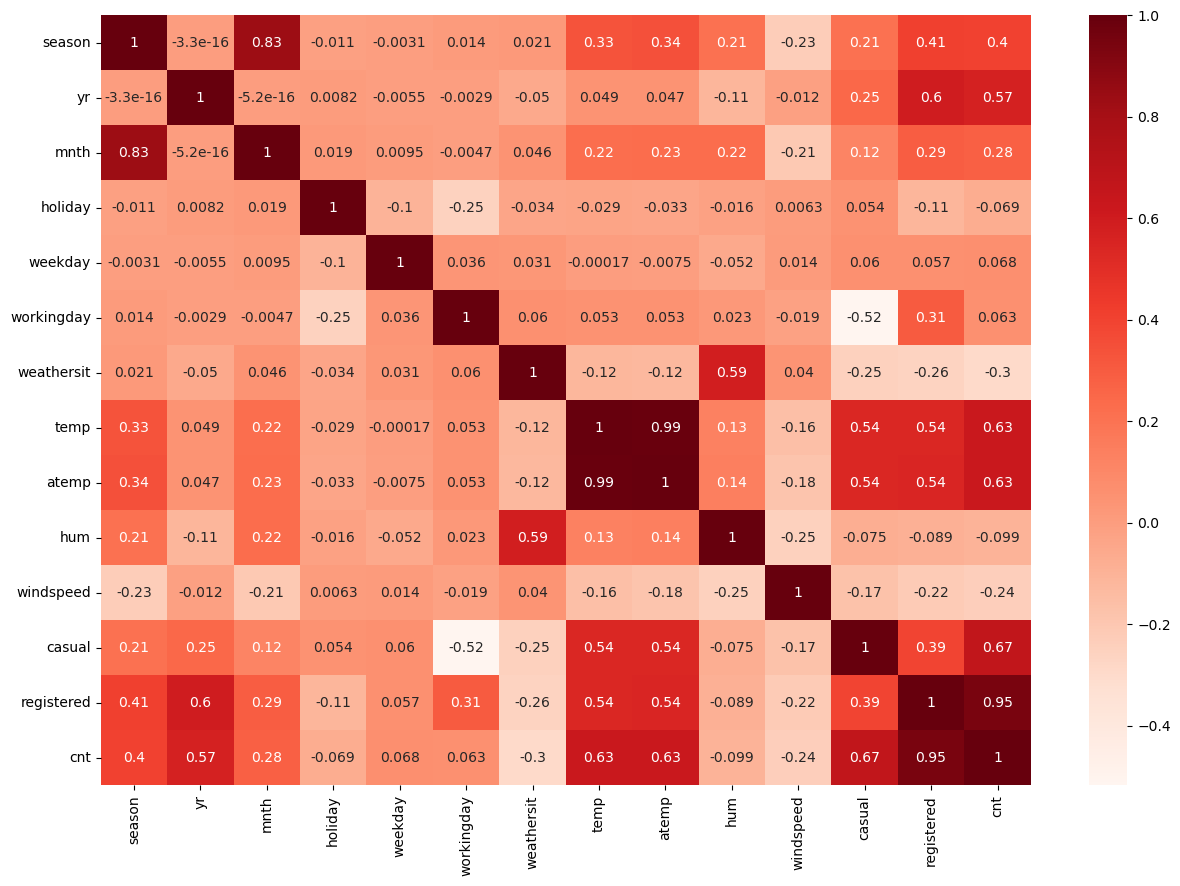

In [11]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='Reds',annot=True)
plt.show()

#### Observations based on heatmap:
1. We see higher positive correlation between 'cnt' and 'season', 'yr', 'mnth', 'temp' and 'atemp'.
2. We can see 'registered' and 'casual' are correlated to 'cnt' which is expected as 'cnt' is formed with sum of 'registered' and 'causal'
3. There could be multicollinearity as we see relation between 'temp' and 'atemp', 'humidity' and 'weathersit', 'month' and 'season', 'temp' and 'season'. 
4. We see strong correlation between 'workingday' and 'registered' users indicating that these registered users may be using bike for commute to work

##### Visualising categorical variables

Let's see how the categorical variables like season, holiday affect the bike rentals for both years 2018 and 2019 

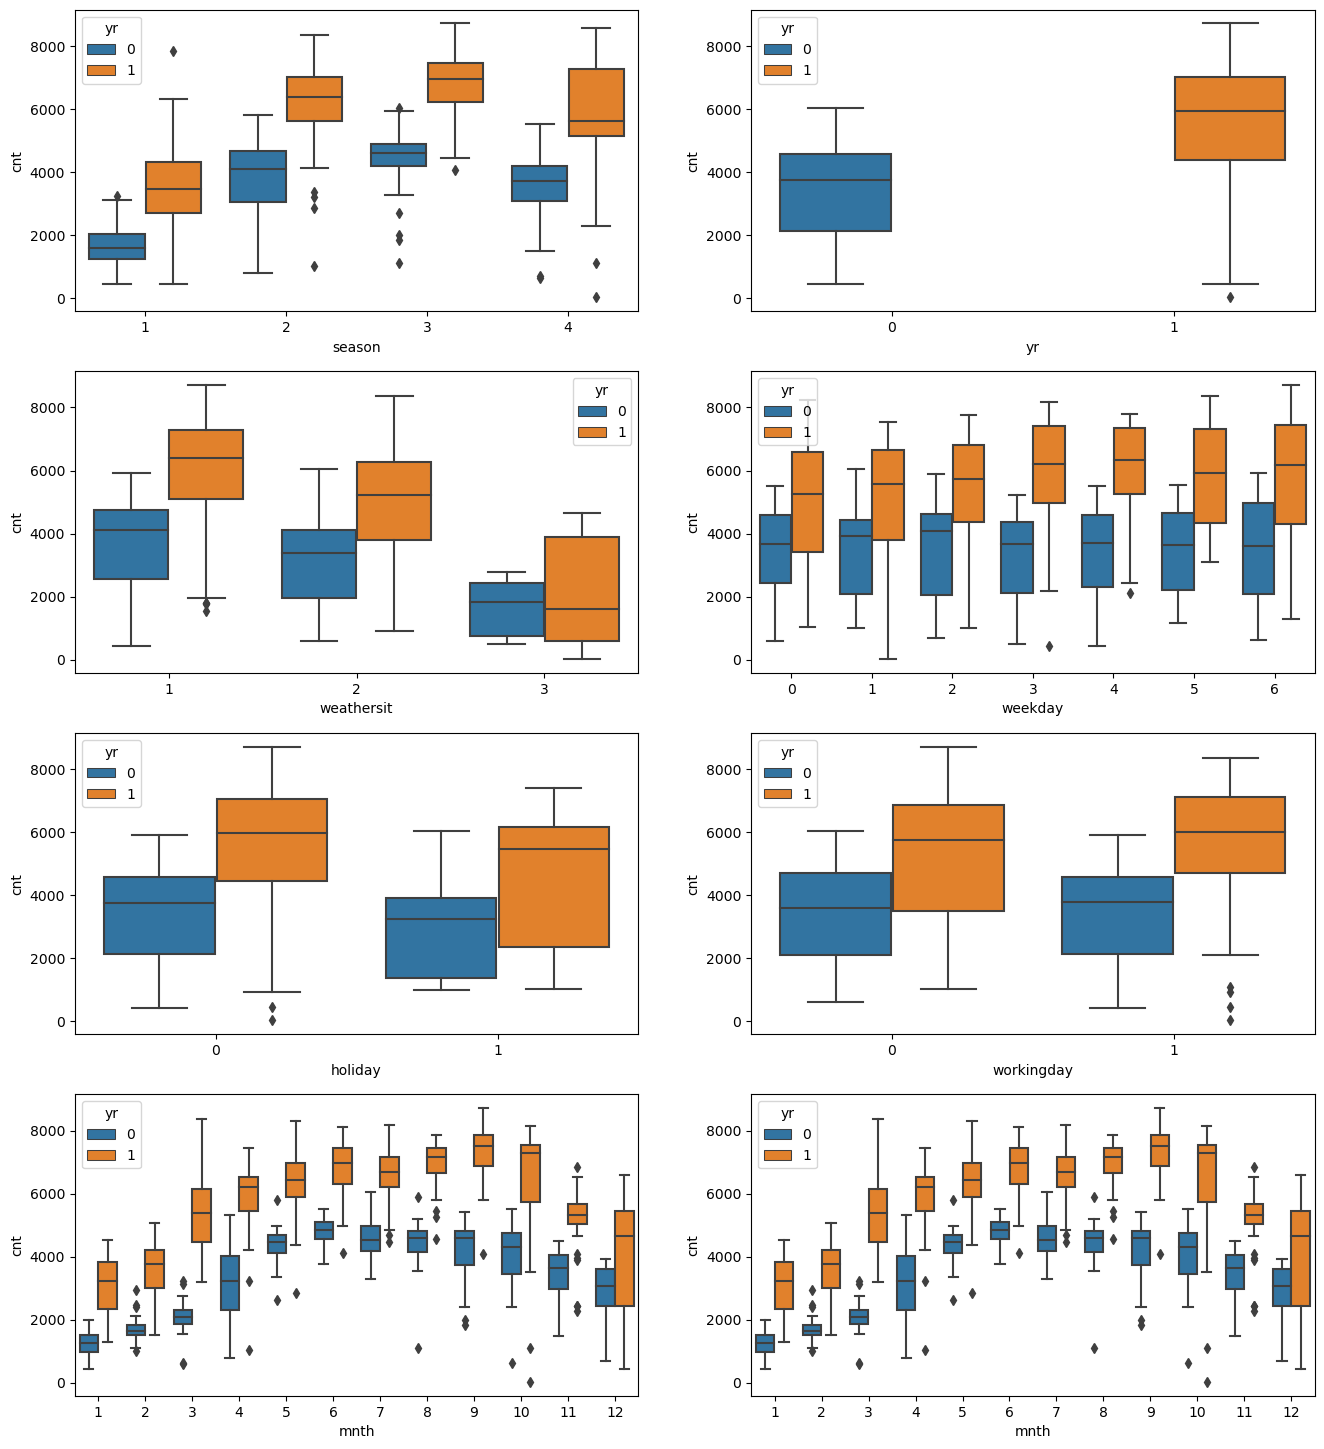

In [12]:
plt.figure(figsize=(16,18))
plt.subplot(4,2,1)
sns.boxplot(data=df,x='season',y='cnt',hue='yr')

plt.subplot(4,2,2)
sns.boxplot(data=df,x='yr',y='cnt',hue='yr')

plt.subplot(4,2,3)
sns.boxplot(data=df,x='weathersit',y='cnt',hue='yr')

plt.subplot(4,2,4)
sns.boxplot(data=df,x='weekday',y='cnt',hue='yr')

plt.subplot(4,2,5)
sns.boxplot(data=df,x='holiday',y='cnt',hue='yr')

plt.subplot(4,2,6)
sns.boxplot(data=df,x='workingday',y='cnt',hue='yr')

plt.subplot(4,2,7)
sns.boxplot(data=df,x='mnth',y='cnt',hue='yr')

plt.subplot(4,2,8)
sns.boxplot(data=df,x='mnth',y='cnt',hue='yr')
plt.show()

#### Observations based on boxplots
1. We see that number of bikes that were rented is higher when the season=3(fall)
2. We see spike in the number of rentals in year 2019
3. Understandably, bike sharing was highest when weather is #1 which is 'Clear day with no clouds or partial clouds'
4. We do not see any bikes rented when season is #4 which is heavy rain/thunderstorms/ice pallets. 
5. Median on rental bikes is lower when it is a holiday
6. We see most bike rentals are in month of september which coincides with season 3(fall)

## Step 3: Data Preparation    


We have below columns that are categorical. 

    1. season
    2. weathersit
    3. month
    4. weekday

In order to include them in the model, we will have to encode them from numeric to alphanumeric and then convert these using dummy variables.


#### Encoding

In [13]:
## Let's start with weather and season and encode them to alphanumeric strings

def weather_map(x):
    return x.map({1: 'Dry', 2: 'Misty', 3:'Wet',4:'Bad'})

def season_map(x):
    return x.map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})

In [14]:
df[['weathersit']] = df[['weathersit']].apply(weather_map)

In [15]:
df[['season']] = df[['season']].apply(season_map)

In [16]:
## check the encoding

df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,Spring,0,1,0,6,0,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-02-01,Spring,0,1,0,0,0,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-03-01,Spring,0,1,0,1,1,Dry,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-04-01,Spring,0,1,0,2,1,Dry,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-05-01,Spring,0,1,0,3,1,Dry,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [17]:
## encoding for mnth and weekday

def mnth_map(x):
    return x.map({1: 'Jan', 2: 'Feb', 3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

def weekday_map(x):
    return x.map({6:'Mon',0:'Tue',1:'Wed',2:'Thu',3:'Fri',4:'Sat',5:'Sun'})

In [18]:
df[['mnth']] = df[['mnth']].apply(mnth_map)

In [19]:
df[['weekday']] = df[['weekday']].apply(weekday_map)

In [20]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,Spring,0,Jan,0,Mon,0,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-02-01,Spring,0,Jan,0,Tue,0,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-03-01,Spring,0,Jan,0,Wed,1,Dry,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-04-01,Spring,0,Jan,0,Thu,1,Dry,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-05-01,Spring,0,Jan,0,Fri,1,Dry,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Dummy Variables

In [21]:
## Let's get dummies for weathersit 

weather = pd.get_dummies(df['weathersit'], drop_first=True)

In [22]:
weather.head()

,Misty,Wet
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0



- `00` will correspond to `Dry`
- `01` will correspond to `Wet`
- `10` will correspond to `Misty`


In [23]:
## Let's merge dataframe 'weather' with the main dataframe.

df = pd.concat([df,weather],axis=1)

In [24]:
## Let's drop original 'weathersit' column

df = df.drop(['weathersit'],axis=1)

In [25]:
## Let's check the dataframe

df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,Misty,Wet
0,2018-01-01,Spring,0,Jan,0,Mon,0,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0
1,2018-02-01,Spring,0,Jan,0,Tue,0,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0
2,2018-03-01,Spring,0,Jan,0,Wed,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0
3,2018-04-01,Spring,0,Jan,0,Thu,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0
4,2018-05-01,Spring,0,Jan,0,Fri,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0


In [26]:
## Let's get the dummies for column 'season'

season = pd.get_dummies(df['season'],drop_first=True)

In [27]:
season.head()

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


- `000` will correspond to `Fall`
- `001` will correspond to `Winter`
- `100` will correspond to `Spring`
- `010` will correspond to `Summer`

In [28]:
## Let's join dataframe 'season' with 'df'

df = pd.concat([df,season],axis=1)

In [29]:
## Let's drop original column 'season' 

df = df.drop(['season'],axis=1)

In [30]:
## check the dataframe now
df.head()

,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,Misty,Wet,Spring,Summer,Winter
0,2018-01-01,0,Jan,0,Mon,0,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,1,0,0
1,2018-02-01,0,Jan,0,Tue,0,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,1,0,0
2,2018-03-01,0,Jan,0,Wed,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,1,0,0
3,2018-04-01,0,Jan,0,Thu,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,1,0,0
4,2018-05-01,0,Jan,0,Fri,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,1,0,0


In [31]:
## Let's get dummies for 'mnth' column

mnth = pd.get_dummies(df['mnth'], drop_first=True)

In [32]:
## Let's check dataframe mnth

mnth.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [33]:
## Let's join dataframe 'mnth' with the original dataframe

df = pd.concat([df,mnth],axis=1)

In [34]:
## Let's drop original mnth column

df = df.drop(['mnth'],axis=1)

In [35]:
df.head()

,dteday,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,2018-01-01,0,0,Mon,0,14.110847,18.18125,80.5833,10.749882,331,...,0,0,1,0,0,0,0,0,0,0
1,2018-02-01,0,0,Tue,0,14.902598,17.68695,69.6087,16.652113,131,...,0,0,1,0,0,0,0,0,0,0
2,2018-03-01,0,0,Wed,1,8.050924,9.47025,43.7273,16.636703,120,...,0,0,1,0,0,0,0,0,0,0
3,2018-04-01,0,0,Thu,1,8.200000,10.60610,59.0435,10.739832,108,...,0,0,1,0,0,0,0,0,0,0
4,2018-05-01,0,0,Fri,1,9.305237,11.46350,43.6957,12.522300,82,...,0,0,1,0,0,0,0,0,0,0


In [36]:
## Let's get dummies for 'weekday'

weekday = pd.get_dummies(df['weekday'],drop_first=True)

In [37]:
weekday.head()

,Mon,Sat,Sun,Thu,Tue,Wed
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [38]:
## Let's join datafram 'weekday' with original datafram 'df'

df = pd.concat([df,weekday],axis=1)

In [39]:
## Let's drop original column for weekday
df = df.drop(['weekday'],axis=1)

In [40]:
df.head()

,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,2018-01-01,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,...,0,0,0,0,1,0,0,0,0,0
1,2018-02-01,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,...,0,0,0,0,0,0,0,0,1,0
2,2018-03-01,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,...,0,0,0,0,0,0,0,0,0,1
3,2018-04-01,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,...,0,0,0,0,0,0,0,1,0,0
4,2018-05-01,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,...,0,0,0,0,0,0,0,0,0,0


##### Redundant columns
Since we have 'registered' and 'casual' mathematically related to 'cnt', we can drop those columns.
'dteday' is a date column and we need int or float to build a model, we will drop this column. We already have 'yr' and 'month' columns along with if they are weekdays or holidays. These should be sufficent for model building. 

In [41]:
df = df.drop(['dteday','casual','registered'],axis=1)

In [42]:
df.corr()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Misty,Wet,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
yr,1.000000e+00,0.008195,-0.002945,0.048789,0.047215,-0.112547,-0.011624,0.569728,-0.005796,-0.073758,...,7.671648e-17,-2.983215e-17,8.571788e-17,-2.138778e-17,-0.003904,-1.086706e-16,-5.819694e-17,-1.950413e-16,0.003904,0.003904
holiday,8.195345e-03,1.000000,-0.252948,-0.028764,-0.032703,-0.015662,0.006257,-0.068764,-0.018668,-0.029619,...,6.362682e-03,6.785194e-02,6.362682e-03,8.174933e-03,-0.070541,-2.325423e-02,-2.325423e-02,-4.670117e-02,-0.070541,0.279764
workingday,-2.945396e-03,-0.252948,1.000000,0.053470,0.052940,0.023202,-0.018666,0.062542,0.048877,0.028990,...,6.541813e-03,-1.087082e-02,-4.023504e-03,-1.087082e-02,-0.602419,2.604690e-01,2.604690e-01,2.688958e-01,-0.602419,0.152976
temp,4.878919e-02,-0.028764,0.053470,1.000000,0.991696,0.128565,-0.158186,0.627044,-0.096297,-0.058461,...,1.651884e-01,-2.066901e-01,-1.761584e-02,1.977294e-01,-0.030363,1.949216e-02,-5.003258e-06,1.935952e-02,-0.026802,-0.004799
atemp,4.721519e-02,-0.032703,0.052940,0.991696,1.000000,0.141512,-0.183876,0.630685,-0.092933,-0.064937,...,1.704469e-01,-1.968773e-01,-4.775183e-03,1.924774e-01,-0.031340,2.045265e-02,-8.544145e-03,2.204543e-02,-0.023247,0.000091
hum,-1.125471e-01,-0.015662,0.023202,0.128565,0.141512,1.000000,-0.248506,-0.098543,0.490628,0.267592,...,1.312731e-01,-5.837193e-03,1.415566e-01,1.831181e-01,-0.023310,-5.200348e-02,-3.980893e-02,4.061570e-02,0.000020,0.028591
windspeed,-1.162435e-02,0.006257,-0.018666,-0.158186,-0.183876,-0.248506,1.000000,-0.235132,-0.037177,0.117332,...,-2.953449e-02,-2.587339e-02,-6.013274e-02,-9.482530e-02,0.032187,5.792278e-03,-2.163260e-02,6.961095e-03,-0.010429,0.000999
cnt,5.697285e-01,-0.068764,0.062542,0.627044,0.630685,-0.098543,-0.235132,1.000000,-0.170686,-0.240602,...,1.325529e-01,-4.034360e-02,1.088461e-01,1.946635e-01,0.009012,3.355106e-02,3.840273e-02,5.596898e-04,-0.059146,-0.035991
Misty,-5.796152e-03,-0.018668,0.048877,-0.096297,-0.092933,0.490628,-0.037177,-0.170686,1.000000,-0.122696,...,4.269306e-02,-5.507084e-02,4.269306e-02,3.989384e-02,-0.011426,-8.677593e-03,4.936233e-02,2.448808e-02,-0.044460,0.013349
Wet,-7.375810e-02,-0.029619,0.028990,-0.058461,-0.064937,0.267592,0.117332,-0.240602,-0.122696,1.000000,...,-5.243172e-02,3.801344e-02,9.455429e-02,3.801344e-02,0.022874,1.927146e-04,-7.014812e-02,2.363966e-02,-0.047187,-0.023834


In [43]:
df.corr().loc['cnt'].sort_values()

Spring       -0.561702
Jan          -0.367167
Feb          -0.273848
Wet          -0.240602
windspeed    -0.235132
Dec          -0.173878
Misty        -0.170686
Mar          -0.128456
hum          -0.098543
holiday      -0.068764
Tue          -0.059146
Nov          -0.040344
Wed          -0.035991
Thu           0.000560
Mon           0.009012
Sat           0.033551
Sun           0.038403
workingday    0.062542
Winter        0.064619
Oct           0.108846
May           0.132553
Summer        0.145325
Jul           0.166236
Aug           0.182100
Sep           0.194664
Jun           0.195568
yr            0.569728
temp          0.627044
atemp         0.630685
cnt           1.000000
Name: cnt, dtype: float64

### Observations based on heatmap after encoding and adding dummy variables

1. Above data is the correlation of the all variables including dummy variables with 'cnt'
2. We see that 'temp', 'atemp','yr' are highly correlated to 'cnt'. 
3. Some categorical variables like 'Jun', 'Sep', 'Aug', 'Summer' etc have high pearson correlation coefficient with 'cnt'
3. Other categorical variables like 'Spring', 'Jan', 'Feb' are negatively correlated to 'cnt'


## Step 4 : Splitting Data in Training and Test sets

In [44]:
## Let's split the data in training and test set

from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Rescaling features. 

Let's rescale the features so we can compare the coeffients and also evaluate the models.
We will use minmax scaling

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
scaler = MinMaxScaler()

In [47]:
## List of variables to apply min max scaler
num_vars = ['temp','atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [48]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Misty,Wet,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,1,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,0,0,0,0,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,1,0,0,0,0,0


In [49]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Misty,Wet,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.343137,0.029412,...,0.084314,0.086275,0.086275,0.080392,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.475223,0.169124,...,0.278131,0.281045,0.281045,0.272166,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Step 5: Building linear model

Let's kick off building the linear model for this data set. Our target variable is 'cnt'. 


In [50]:
y_train = df_train.pop('cnt')
X_train = df_train
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          510 non-null    int64  
 1   holiday     510 non-null    int64  
 2   workingday  510 non-null    int64  
 3   temp        510 non-null    float64
 4   atemp       510 non-null    float64
 5   hum         510 non-null    float64
 6   windspeed   510 non-null    float64
 7   Misty       510 non-null    uint8  
 8   Wet         510 non-null    uint8  
 9   Spring      510 non-null    uint8  
 10  Summer      510 non-null    uint8  
 11  Winter      510 non-null    uint8  
 12  Aug         510 non-null    uint8  
 13  Dec         510 non-null    uint8  
 14  Feb         510 non-null    uint8  
 15  Jan         510 non-null    uint8  
 16  Jul         510 non-null    uint8  
 17  Jun         510 non-null    uint8  
 18  Mar         510 non-null    uint8  
 19  May         510 non-null    

In [51]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 510 entries, 653 to 79
Series name: cnt
Non-Null Count  Dtype  
--------------  -----  
510 non-null    float64
dtypes: float64(1)
memory usage: 8.0 KB


## Let's try RFE to select features

In [52]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [53]:
# Running RFE with the output number of the variable equal to 10
lm_rfe = LinearRegression()
lm_rfe.fit(X_train, y_train)

rfe = RFE(lm_rfe)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [54]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Misty', True, 1),
 ('Wet', True, 1),
 ('Spring', True, 1),
 ('Summer', False, 2),
 ('Winter', True, 1),
 ('Aug', False, 9),
 ('Dec', False, 5),
 ('Feb', False, 6),
 ('Jan', False, 3),
 ('Jul', True, 1),
 ('Jun', False, 15),
 ('Mar', False, 16),
 ('May', False, 8),
 ('Nov', False, 4),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 14),
 ('Sun', False, 10),
 ('Thu', False, 13),
 ('Tue', True, 1),
 ('Wed', False, 11)]

In [55]:
## Grabbing the columns which has rfe.support_ as True
cols = X_train.columns[rfe.support_]
cols

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Misty',
       'Wet', 'Spring', 'Winter', 'Jul', 'Sep', 'Mon', 'Tue'],
      dtype='object')

### Let's now build model using statsmodel so we can check more details on the model

In [56]:
import statsmodels.api as sm

### Model building pass # 1

In [57]:
## Model building pass # 1

X_train_1 = X_train[cols]
X_train_1 = sm.add_constant(X_train_1)

# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_1).fit()

In [58]:
lr_1.params

const         0.241820
yr            0.230747
holiday      -0.008756
workingday    0.094533
temp          0.478831
hum          -0.146625
windspeed    -0.168644
Misty        -0.059397
Wet          -0.251250
Spring       -0.106709
Winter        0.057896
Jul          -0.077874
Sep           0.059464
Mon           0.104340
Tue           0.051703
dtype: float64

In [59]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.6
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          3.81e-190
Time:                        11:16:55   Log-Likelihood:                 511.45
No. Observations:                 510   AIC:                            -994.9
Df Residuals:                     496   BIC:                            -935.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2418      0.025      9.590      0.0

### VIF calculation for model # 1

In [60]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [61]:
X_train_1_VIF = X_train_1.drop(['const'], axis=1)

In [62]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_1_VIF.columns
vif['VIF'] = [variance_inflation_factor(X_train_1_VIF.values, i) for i in range(X_train_1_VIF.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,40.71
12,Mon,9.93
13,Tue,9.64
3,temp,2.99
8,Spring,2.55
1,holiday,2.54
4,hum,1.89
9,Winter,1.78
6,Misty,1.57
10,Jul,1.30


### Observations for Model # 1 
1. R-squared for this model is 0.843 and adjusted R-square is 0.839 and this is pretty good score to begin with
2. However the p-value for the variable 'holiday'  is 0.681 which is a bit higher. We expect this to be smaller than 0.05
4. We see that VIF is very high for 'workingday', 'Sun', 'Mon'. It is ideal to have this value below 5 for these variables.
5. 'workingday' and the 'weekday' variables are related as we know. 
6. We have option to drop 'holiday' based on high p-value or drop 'workingday' based on high VIF.

Let's go with dropping 'workingday' first


### Model building pass # 2

In [63]:
X_train_2 = X_train_1.drop(['workingday'],axis=1)

In [64]:
# Create a fitted model
lr_2 = sm.OLS(y_train, X_train_2).fit()

In [65]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.6
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          3.81e-190
Time:                        11:17:29   Log-Likelihood:                 511.45
No. Observations:                 510   AIC:                            -994.9
Df Residuals:                     496   BIC:                            -935.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3364      0.031     10.879      0.0

### VIF calculation for model # 2

In [66]:
X_train_2_VIF = X_train_2.drop(['const'], axis=1)

In [67]:
vif = pd.DataFrame()
vif['Features'] = X_train_2_VIF.columns
vif['VIF'] = [variance_inflation_factor(X_train_2_VIF.values, i) for i in range(X_train_2_VIF.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,22.65
2,temp,15.30
4,windspeed,4.06
7,Spring,2.55
5,Misty,2.25
8,Winter,2.10
0,yr,2.06
9,Jul,1.40
11,Mon,1.23
12,Tue,1.23


### Observations for Model # 2
1. R-squared for this is model is 0.843 and adj. R-square is 0.839 which has not changed after dropping 'workingday' column. 
2. p-value for 'holiday' is still higher and it is 0.681
3. We see VIF for 'humidity' is now very high. 
4. Sign on the coefficients for the predictors have not changed. However, model is not stable yet. 
5. Let's go with dropping 'humidity' column as it is related to the seasons and temp.


### Model building pass # 3

In [68]:
### Let's drop hum first as it has a high VIF

X_train_3 = X_train_2.drop(['hum'],axis=1)

In [69]:
#X_train_RFE = sm.add_constant(X_train_RFE)

# Create a first fitted model
lr_3 = sm.OLS(y_train, X_train_3).fit()

In [70]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     215.3
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          4.38e-188
Time:                        11:18:32   Log-Likelihood:                 503.75
No. Observations:                 510   AIC:                            -981.5
Df Residuals:                     497   BIC:                            -926.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2575      0.024     10.857      0.0

In [71]:
X_train_3_VIF = X_train_3.drop(['const'], axis=1)

In [72]:
vif = pd.DataFrame()
vif['Features'] = X_train_3_VIF.columns
vif['VIF'] = [variance_inflation_factor(X_train_3_VIF.values, i) for i in range(X_train_3_VIF.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.73
3,windspeed,4.04
0,yr,2.06
6,Spring,1.68
4,Misty,1.52
7,Winter,1.43
8,Jul,1.35
10,Mon,1.23
11,Tue,1.21
9,Sep,1.20


### Observations for Model # 3
1. R-squared for this is model has slightly dropped to 0.839 and adj. R-squared has dropped to 0.835. 
2. p-value for 'Mon' is high
3. VIF for all the predictors is below 5. So we have addressed multicollinearity
4. Let's drop 'Mon' column as it seems insignificant based on the p-value

In [78]:
### Let's drop 'Mon' first as it has a high p-value

X_train_4 = X_train_3.drop(['Mon'],axis=1)

In [74]:
#X_train_RFE = sm.add_constant(X_train_RFE)

# Create a first fitted model
lr_4 = sm.OLS(y_train, X_train_4).fit()

In [75]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     234.8
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          4.60e-189
Time:                        11:19:01   Log-Likelihood:                 503.24
No. Observations:                 510   AIC:                            -982.5
Df Residuals:                     498   BIC:                            -931.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2597      0.024     10.993      0.0

In [76]:
X_train_4_VIF = X_train_4.drop(['const'], axis=1)

In [77]:
vif = pd.DataFrame()
vif['Features'] = X_train_4_VIF.columns
vif['VIF'] = [variance_inflation_factor(X_train_4_VIF.values, i) for i in range(X_train_4_VIF.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.67
3,windspeed,4.01
0,yr,2.06
6,Spring,1.66
4,Misty,1.52
7,Winter,1.41
8,Jul,1.35
9,Sep,1.20
10,Tue,1.18
5,Wet,1.08


### Observations for Model # 4

1. R-squared for this is model has slightly dropped to 0.838 and adj. R-squared has dropped to 0.835. 
2. VIF for all the predictors is below 5. 

## Step 6: Residual Analysis

Let's do the residual analysis on model # 4 to see if the error terms are random and normally distributed around 0

In [79]:
y_train_cnt = lr_4.predict(X_train_4)

In [80]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

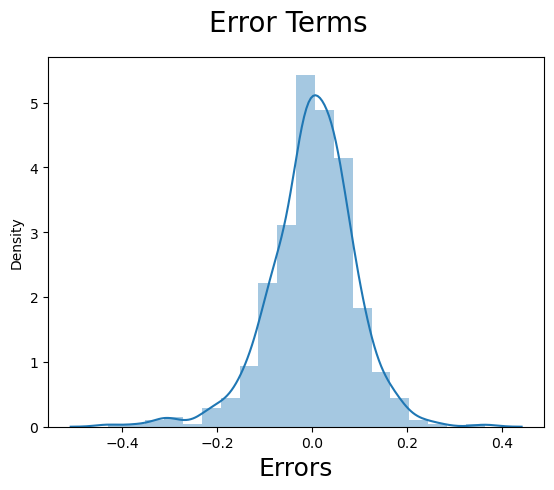

In [81]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Text(0, 0.5, 'y_train - y_train_cnt')

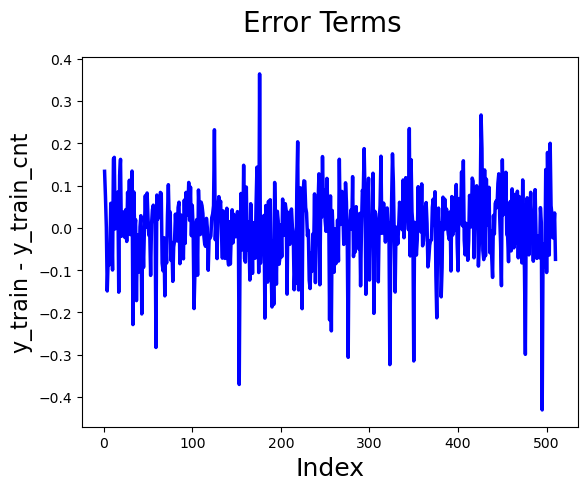

In [82]:
# Error terms
c = [i for i in range(1,511,1)]
fig = plt.figure()
plt.plot(c,y_train-y_train_cnt, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('y_train - y_train_cnt', fontsize=16)                # Y-label

### Observations based on error terms

1. We see error terms are normally distributed around 0. 
2. Also, based on the second graph, error terms are random and there is no predictable pattern with it.

## Step 7 : Making Predictions using final model

In [83]:
num_vars = ['temp','atemp','hum','windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [84]:
y_test = df_test.pop('cnt')
X_test = df_test

In [85]:
X_train_4.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'Misty', 'Wet', 'Spring',
       'Winter', 'Jul', 'Sep', 'Tue'],
      dtype='object')

In [86]:
X_train_4 = X_train_4.drop(['const'],axis=1)

In [87]:
X_test_new = X_test[X_train_4.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [88]:
# Making predictions
y_pred = lr_4.predict(X_test_new)

## Step 8:  Model evaluation

Text(0, 0.5, 'y_pred')

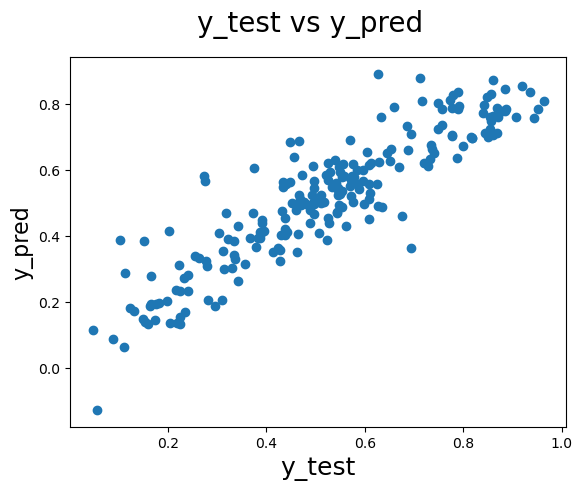

In [89]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [90]:
from sklearn.metrics import mean_squared_error, r2_score
r2_score(y_test, y_pred)

0.809677795028276

In [91]:
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [92]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.009039506934075911
r_square_value : 0.809677795028276


Text(0, 0.5, 'Views')

<Figure size 2000x1800 with 0 Axes>

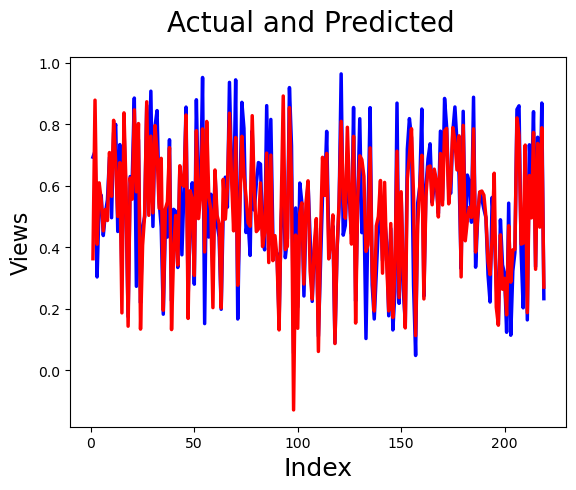

In [93]:
#Actual vs Predicted
plt.figure(figsize=(20,18))
c = [i for i in range(1,220,1)]
fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)      

Text(0, 0.5, 'y_test - y_pred')

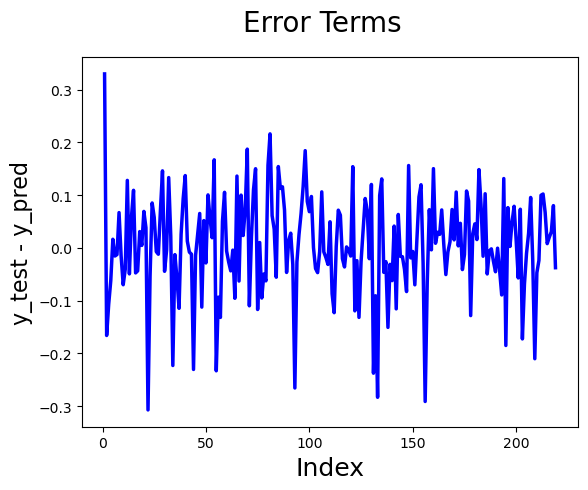

In [94]:
# Error terms
c = [i for i in range(1,220,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('y_test - y_pred', fontsize=16)                # Y-label

In [95]:
## Re-adding the statement
from sklearn.metrics import mean_squared_error, r2_score
r2_score(y_test, y_pred)

0.809677795028276

## Conclusion 

1. With the model#4 we can predict 80 percent variance in the test data. 
2. Model is not able to predict highs and lows, however, it is good at predicting the data within a range. 
3. Equation for the best fitted line looks like below

$ cnt = 0.2340  \times  yr - 0.1062  \times  holiday + 0.4502 \times temp - 0.1396 \times windspeed - 0.0831 \times Misty - 0.2916 \times Wet - 0.1102 \times Spring + 0.0494 \times Winter - 0.0704 \times Jul + 0.0564 \times Sep - 0.0479 \times Tue + 0.2597 $